In [1]:
import tomllib
from itertools import islice

import ehc_sn as ehc
import matplotlib.pyplot as plt
import torch

import plots

In [2]:
encoder = ehc.encoders.PoissonEncoder()
decoder = ehc.decoders.HannDecoder(window_length=1000)

In [3]:
with open("configurations/balanced_network.toml", "rb") as f:
    data = tomllib.load(f)

In [4]:
parameters = ehc.Parameters.model_validate(data)
model = ehc.Network(p=parameters)
model = torch.compile(model)
model.eval()

OptimizedModule(
  (_orig_mod): Network(
    (excitatory): EILayer(
      (neurons): BaseLayer(p=LIFRefracParameters(lif=LIFParameters(tau_syn_inv=tensor(0.2000, device='cuda:0'), tau_mem_inv=tensor(0.5000, device='cuda:0'), v_leak=tensor(-45., device='cuda:0'), v_th=tensor(-50., device='cuda:0'), v_reset=tensor(-60., device='cuda:0'), method='super', alpha=tensor(0.5000, device='cuda:0')), rho_reset=tensor(5, device='cuda:0')), dt=0.001)
      (ampa): Inputs()
      (gaba): Inputs()
    )
    (inhibitory): EILayer(
      (neurons): BaseLayer(p=LIFRefracParameters(lif=LIFParameters(tau_syn_inv=tensor(0.1000, device='cuda:0'), tau_mem_inv=tensor(0.5000, device='cuda:0'), v_leak=tensor(-50., device='cuda:0'), v_th=tensor(-50., device='cuda:0'), v_reset=tensor(-60., device='cuda:0'), method='super', alpha=tensor(0.5000, device='cuda:0')), rho_reset=tensor(5, device='cuda:0')), dt=0.001)
      (ampa): Inputs()
      (gaba): Inputs()
    )
  )
)

In [5]:
signal_gain = 0.1  # Signal gain
xmin, xmax = 0, 10
ymin, ymax = 0, 20

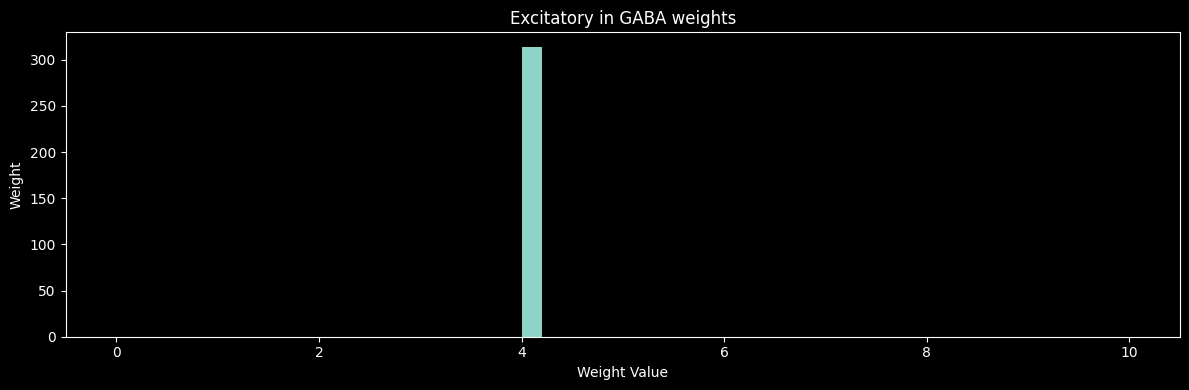

In [6]:
w = model.excitatory.gaba.w.detach().cpu()
mask = model.excitatory.gaba.mask.detach().cpu()
filtered_weights = w.masked_select(mask)
plots.weights(filtered_weights, "Excitatory in GABA weights")
plt.show()

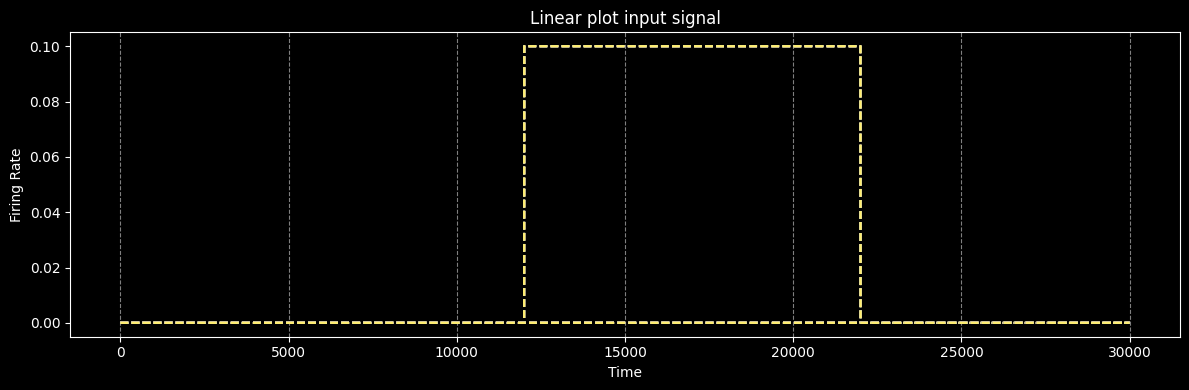

In [7]:
signal_in = torch.zeros(30000, 40).to(ehc.device)
signal_in[12000:22000, xmin:xmax] = signal_gain
signal_loader = iter(signal_in)
plots.signal(signal_in.cpu(), "Linear plot input signal")
plt.show()

In [8]:
spikes_in = torch.stack([encoder(x) for x in islice(signal_loader, 11500)])
_ = torch.stack([model(x) for x in spikes_in])

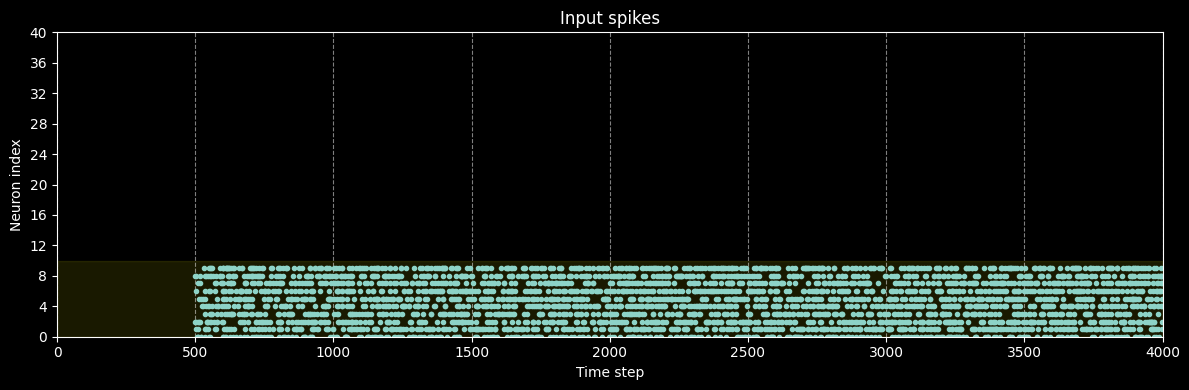

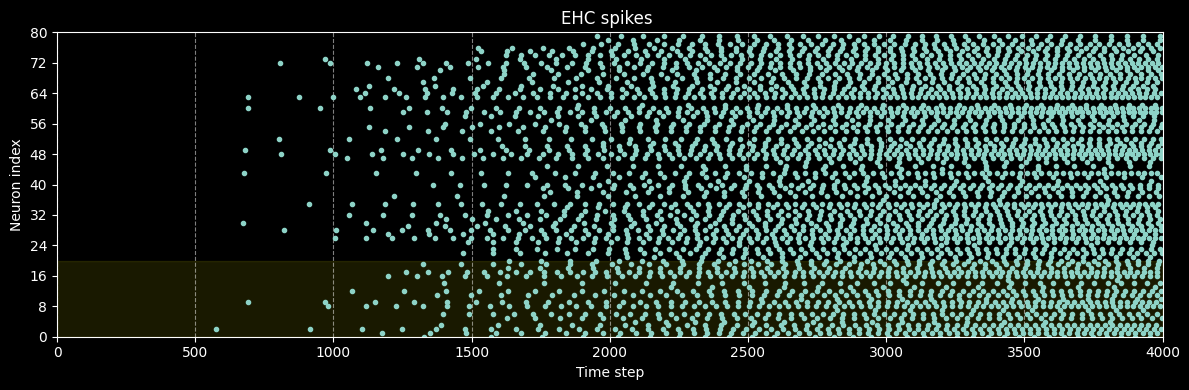

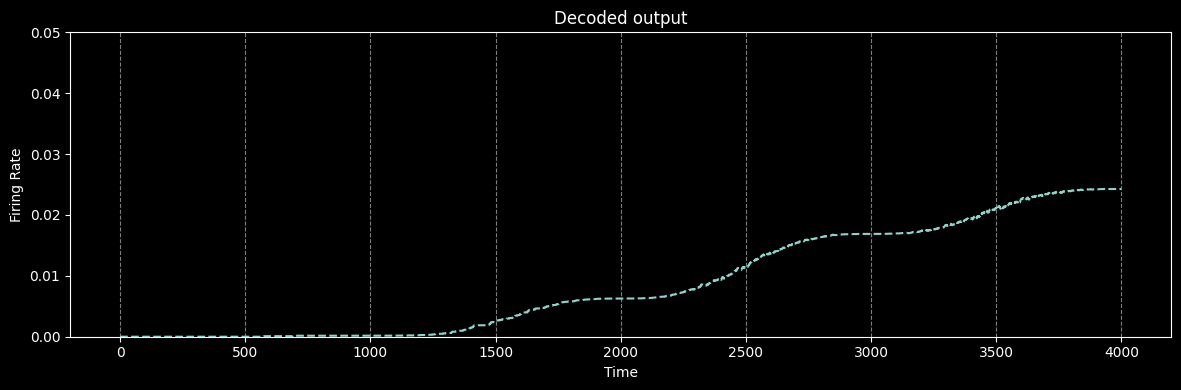

In [9]:
spikes_in = torch.stack([encoder(x) for x in islice(signal_loader, 4000)])
plots.raster(spikes_in.cpu(), "Input spikes")
plt.axhspan(xmin, xmax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_in.shape[1])
plt.show()

spikes_out = torch.stack([model(x) for x in spikes_in])
plots.raster(spikes_out.cpu(), "EHC spikes ")
plt.axhspan(ymin, ymax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.05)
plt.show()

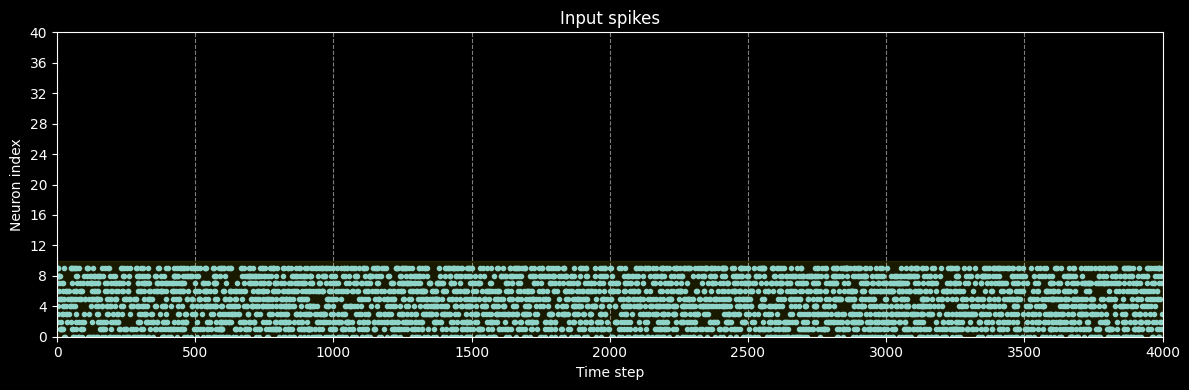

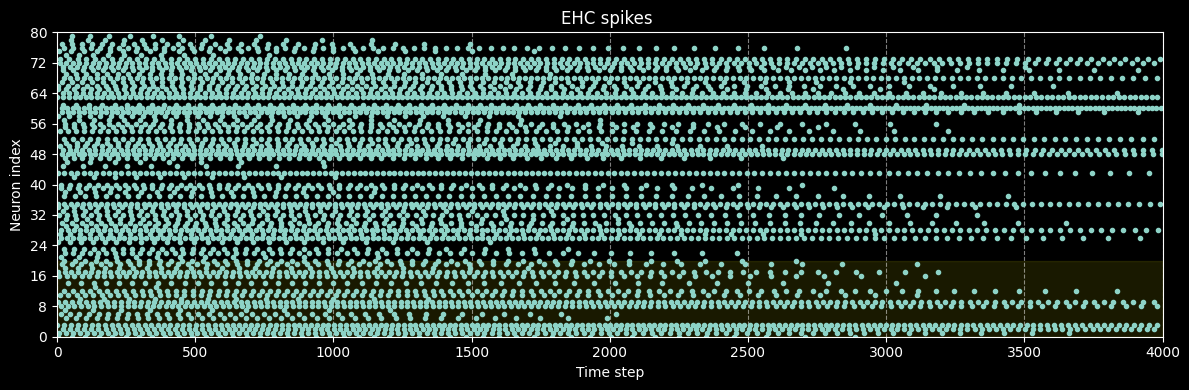

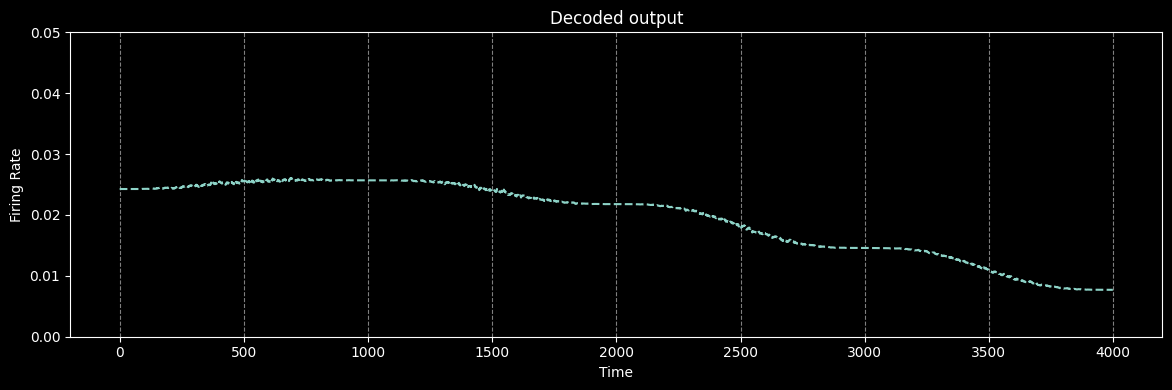

In [10]:
spikes_in = torch.stack([encoder(x) for x in islice(signal_loader, 4000)])
plots.raster(spikes_in.cpu(), "Input spikes")
plt.axhspan(xmin, xmax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_in.shape[1])
plt.show()

spikes_out = torch.stack([model(x) for x in spikes_in])
plots.raster(spikes_out.cpu(), "EHC spikes ")
plt.axhspan(ymin, ymax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.05)
plt.show()

In [11]:
spikes_in = torch.stack([encoder(x) for x in islice(signal_loader, 2000)])
_ = torch.stack([model(x) for x in spikes_in])

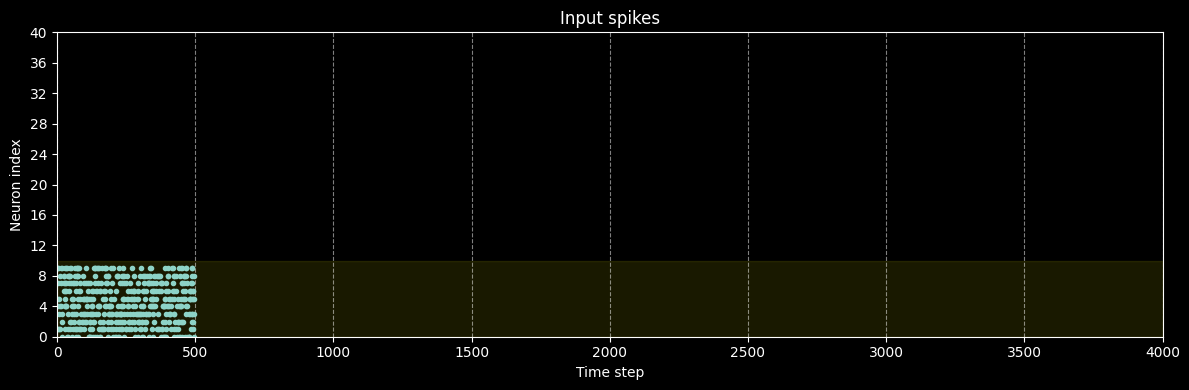

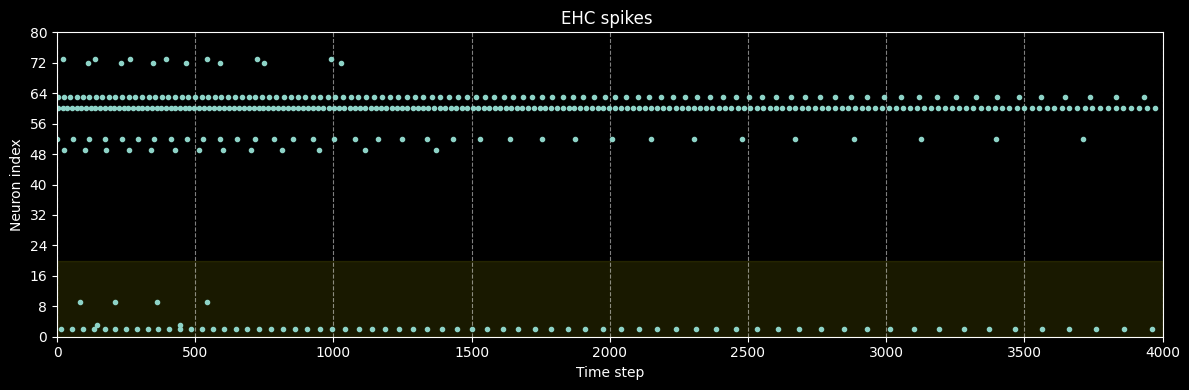

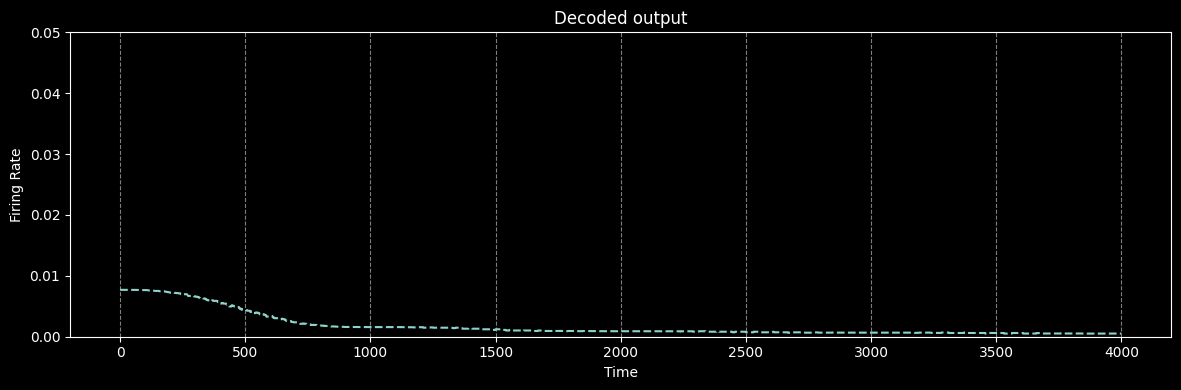

In [12]:
spikes_in = torch.stack([encoder(x) for x in islice(signal_loader, 4000)])
plots.raster(spikes_in.cpu(), "Input spikes")
plt.axhspan(xmin, xmax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_in.shape[1])
plt.show()

spikes_out = torch.stack([model(x) for x in spikes_in])
plots.raster(spikes_out.cpu(), "EHC spikes ")
plt.axhspan(ymin, ymax, color="yellow", alpha=0.1, label="Highlighted Band")
plt.ylim(0, spikes_out.shape[1])
plt.show()

signal_out = torch.stack([decoder(x) for x in spikes_out[:, ymin:ymax]])
signal_out = signal_out.mean(dim=1).unsqueeze(1).detach()
plots.signal(signal_out.cpu(), "Decoded output")
plt.ylim(0, 0.05)
plt.show()

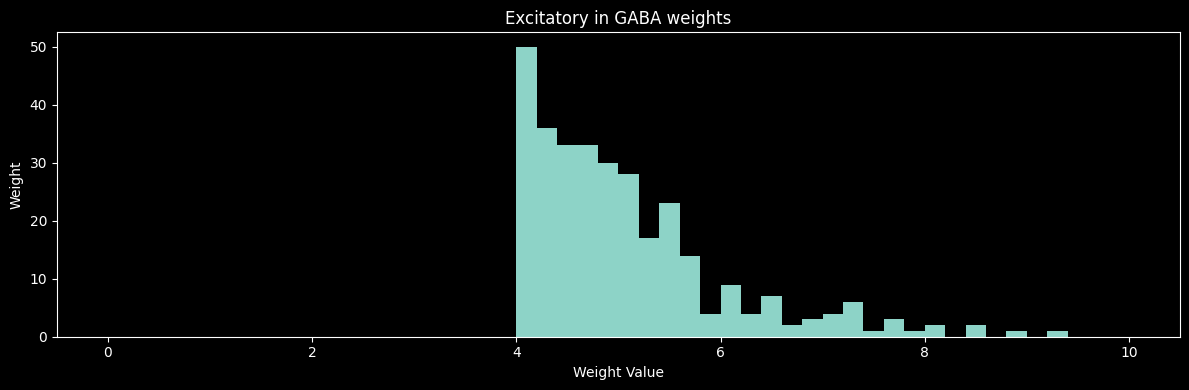

In [13]:
w = model.excitatory.gaba.w.detach().cpu()
mask = model.excitatory.gaba.mask.detach().cpu()
filtered_weights = w.masked_select(mask)
plots.weights(filtered_weights, "Excitatory in GABA weights")
plt.show()